In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"C:\Users\ABHINANDAN\Desktop\data science\New folder\DSData-master\titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Lets check  number of null values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#lets check information related to dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.fillna(value = 0 ,inplace = True)   #replace NaN with 0
df["Age"].replace(0,df["Age"].mean(),inplace=True)     #continuous data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.799293,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [6]:
#check unique cabin
df['Cabin'].unique()

array([0, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       '

In [7]:
cabin = df["Cabin"].astype(str)   #convert to string
new_cabin = np.array([i[0] for i in cabin])  #take first letter only as we just want cabin name
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()

,counts,freqs
categories,,
0,687,0.771044
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122


In [8]:
df["Cabin"] = new_cabin
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.799293,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [9]:
#Lets drop unwanted columns
#As column Cabin has arround 77% Null values, so we are removing that column also
drop_columns = ['PassengerId','Name','Ticket','Cabin']
df = df.drop(columns = drop_columns, axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,23.799293,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [10]:
#lets check the most frequent element in Embarked column
df["Embarked"].value_counts()

S    644
C    168
Q     77
0      2
Name: Embarked, dtype: int64

In [11]:
#replace null values with most frequent element
df['Embarked'] = df['Embarked'].replace(0,'S')

In [15]:
#lets convert Age column to int data type
df["Age"] = df['Age'].astype(int)

In [17]:
#lets check the updated data
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,23,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


<AxesSubplot:xlabel='Pclass', ylabel='count'>

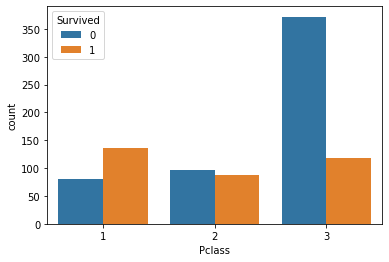

In [18]:
#Lets visualize the data related to class and survived
sns.countplot(x= "Pclass", hue= "Survived" , data = df)

In first class more number of people survived compared to not survived.

In second class there is almost equal number of peoples survived and notsurvived.

In third class more number of peoples died compared to survived.

<AxesSubplot:xlabel='Sex', ylabel='count'>

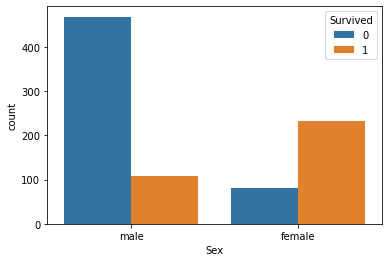

In [19]:
sns.countplot(x= "Sex", hue= "Survived" , data = df)

We can see from above plot more number of males are not survived compared to survived

On the other hand more females survived compared to not survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

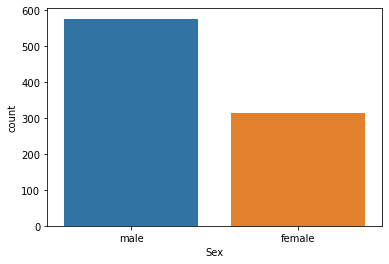

In [20]:
sns.countplot(x= "Sex", data = df)

we can see that number of people survived is less than that of died

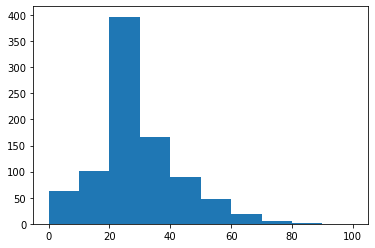

In [21]:
plt.hist(x = "Age", bins=range(0,110,10),data=df)
plt.show()

From above plot we can say, there are large number of people in the range of 20 to 30 years of age.

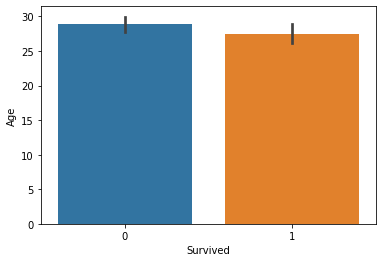

In [22]:
#check average age of survived and not survived
sns.barplot(x="Survived",y="Age",data=df)
plt.show()

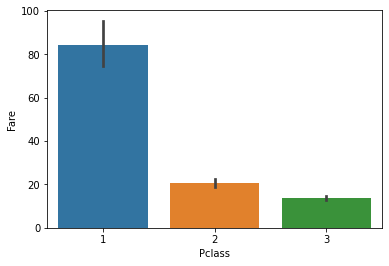

In [23]:
#lets check the averge fare price for 1st class 2nd class and 3rd class
sns.barplot(x="Pclass",y="Fare",data=df)
plt.show()
#fare price for 1st class is far more than 2nd classz and 3 class

<AxesSubplot:xlabel='SibSp', ylabel='count'>

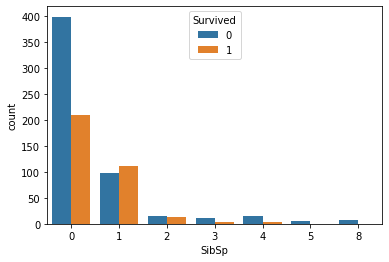

In [24]:
sns.countplot(x= "SibSp", hue= "Survived" , data = df)

From above plot we can say large number of people who are not with their family are not survived compared to survived.

<AxesSubplot:xlabel='Parch', ylabel='count'>

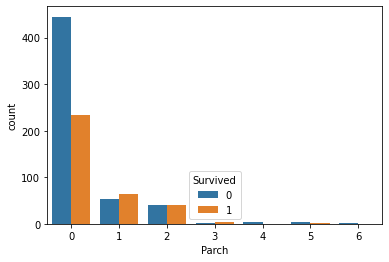

In [25]:
sns.countplot(x= "Parch", hue= "Survived" , data = df)

In [26]:
#lets convert sex column into integer
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df2 = lab_enc.fit_transform(df['Sex'])
df3 = lab_enc.fit_transform(df['Embarked'])
pd.Series(df2)
pd.Series(df3)
df["Sex"] = df2
df["Embarked"] = df3
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [27]:
#lets describe the data
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.352413,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.281369,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [28]:
#Lets split our data into features and label
X = df.drop(columns = "Survived", axis = 1)
y = df["Survived"]

In [29]:
y.value_counts()      #check for imbalance

0    549
1    342
Name: Survived, dtype: int64

### Find best random_state

In [30]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8789237668161435 on Random State 150


In [31]:
#lets train test the data with best random_state
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = max_rs )

In [32]:
#model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8789237668161435
[[123  11]
 [ 16  73]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       134
           1       0.87      0.82      0.84        89

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



In [33]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

0.8430493273542601
[[114  20]
 [ 15  74]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       134
           1       0.79      0.83      0.81        89

    accuracy                           0.84       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.84      0.84       223



In [34]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

0.8340807174887892
[[118  16]
 [ 21  68]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       134
           1       0.81      0.76      0.79        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.83      0.83      0.83       223



In [35]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
kn =  KNeighborsClassifier()
kn.fit(x_train, y_train)
pred_kn = kn.predict(x_test)
print(accuracy_score(y_test,pred_kn))
print(confusion_matrix(y_test,pred_kn))
print(classification_report(y_test,pred_kn))

0.7757847533632287
[[114  20]
 [ 30  59]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       134
           1       0.75      0.66      0.70        89

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223



In [36]:
#model with SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = rf.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8340807174887892
[[118  16]
 [ 21  68]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       134
           1       0.81      0.76      0.79        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.83      0.83      0.83       223



In [37]:
#lets check for overfitting with cross-validation
#for LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
scores = cross_val_score(LR, X, y, cv=5)
print("Cross validation score of Logistic Regression model is :", scores.mean())

Cross validation score of Logistic Regression model is : 0.7923733601154982


In [38]:
#Let's check cross validation score for DecisionTreeClassifier
scores = cross_val_score(dt, X, y, cv=5)
print("Cross validation score of DecisionTreeClassifier model is :", scores.mean())

Cross validation score of DecisionTreeClassifier model is : 0.7845332998556274


In [39]:
#Let's check cross validation score for RandomForestClassifier
scores = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of RandomForestClassifier model is :", scores.mean())

Cross validation score of RandomForestClassifier model is : 0.8148327160881299


In [40]:
#Let's check cross validation score for KNeighborsClassifier
scores = cross_val_score(kn, X, y, cv=5)
print("Cross validation score of KNeighborsClassifier model is :", scores.mean())

Cross validation score of KNeighborsClassifier model is : 0.7003640700520997


In [41]:
#Let's check cross validation score for SVC
scores = cross_val_score(svc, X, y, cv=5)
print("Cross validation score of SVC model is :", scores.mean())

Cross validation score of SVC model is : 0.6734982110350888


From cross validation we get RandomForestClassifier model is best model, as it has less difference in accuracy and cv score compared to other algorithms.

# ROC & AUC Curve

In [42]:
#Lets find roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
roc_auc_score(y_test, LR.predict(x_test))   #for LogisticRegresion

0.8690675834311589

In [43]:
roc_auc_score(y_test, dt.predict(x_test))   #for DecesionTreeClassifier

0.8411034714070099

In [44]:
roc_auc_score(y_test, rf.predict(x_test))   #for RandomForestClassifier

0.822320979372799

In [45]:
roc_auc_score(y_test, kn.predict(x_test))   #for KNeighborsClassifier

0.7568338084856616

In [46]:
roc_auc_score(y_test, svc.predict(x_test))   #for SVC

0.6349153110850242

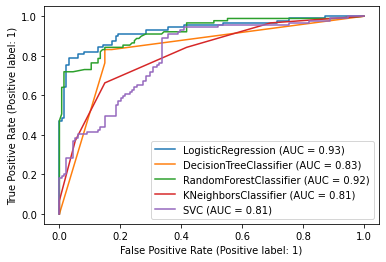

In [47]:
#Check ROC AUC for all models by plotting roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

By observing roc_curve and AUC we can say LogisticRegression and RandomForestClassifier are nearly giving equal performance.

But by considering cross validation we can select RandomForetClassifier as a best fit model between these two, for further process.

## Hyperparameter Tunning

In [48]:
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [5,9,10,12,15],
                'n_estimators':[200,500,700],
                'max_features':['aoto','sqrt','log2']
                }

In [49]:
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 9, 10, 12, 15],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 700]})

In [50]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [51]:
#Let's train and test our model using best parameters
model = RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt', n_estimators=500)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 88.34080717488789%
---------------------------------------------------
Confusion Matrix : 
 [[128   6]
 [ 20  69]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       134
           1       0.92      0.78      0.84        89

    accuracy                           0.88       223
   macro avg       0.89      0.87      0.87       223
weighted avg       0.89      0.88      0.88       223



Now we got higher accuracy after hyperparameter tunning with randomforest model

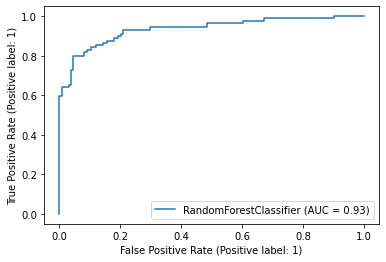

In [53]:
#Lets plot roc_curve for best fit model
plot_roc_curve(model, x_test, y_test)

## Saving the model

In [54]:
import joblib
joblib.dump(model,"Titanic_train.pkl")

['Titanic_train.pkl']